<a href="https://colab.research.google.com/github/braghav968/Automatic-Liver-Tumour-Segmentation/blob/main/NII2NPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
/content/drive/MyDrive/Trail-dataset

In [1]:
!pip install nibabel

In [4]:
%pwd

'/content'

In [2]:
import os
import numpy as np
import nibabel

data_path = '/content/drive/MyDrive/raw'
#we will undersample our training 2D images later (for memory and speed)
image_rows = int(512/2)
image_cols = int(512/2) 


def create_train_data():
    print('-'*30)
    print('Creating training data...')
    print('-'*30)
    train_data_path = os.path.join(data_path, 'train')
    images = os.listdir(train_data_path)
    # print("start")
    # print(images)
    # print('end')
    #training images
    imgs_train = [] 
    #training masks (corresponding to the liver)
    masks_train = []    
    #file names corresponding to training masks
    # training_masks = images[::2]
    # #file names corresponding to training images
    # training_images = images[1::2] 
    training_masks=['ircad_e01_liver.nii.gz','ircad_e02_liver.nii.gz','ircad_e03_liver.nii.gz','ircad_e04_liver.nii.gz','ircad_e05_liver.nii.gz','ircad_e06_liver.nii.gz','ircad_e07_liver.nii.gz','ircad_e08_liver.nii.gz','ircad_e09_liver.nii.gz','ircad_e10_liver.nii.gz','ircad_e11_liver.nii.gz','ircad_e12_liver.nii.gz','ircad_e13_liver.nii.gz']
    training_images=['ircad_e01_orig.nii.gz','ircad_e02_orig.nii.gz','ircad_e03_orig.nii.gz','ircad_e04_orig.nii.gz','ircad_e05_orig.nii.gz','ircad_e06_orig.nii.gz','ircad_e07_orig.nii.gz','ircad_e08_orig.nii.gz','ircad_e09_orig.nii.gz','ircad_e10_orig.nii.gz','ircad_e11_orig.nii.gz','ircad_e12_orig.nii.gz','ircad_e13_orig.nii.gz']


        
    for liver, orig in zip(training_masks, training_images):
        #we load 3D training mask (shape=(512,512,129))
        training_mask = nibabel.load(os.path.join(train_data_path, liver))
        #we load 3D training image
        training_image = nibabel.load(os.path.join(train_data_path, orig)) 
        
        for k in range(training_mask.shape[2]):
            #axial cuts are made along the z axis with undersampling
            mask_2d = np.array(training_mask.get_data()[::2, ::2, k]) 
            image_2d = np.array(training_image.get_data()[::2, ::2, k])
            #we only recover the 2D sections containing the liver
            #if mask_2d contains only 0, it means that there is no liver
            if len(np.unique(mask_2d)) != 1:
                masks_train.append(mask_2d)
                imgs_train.append(image_2d)
                    
    imgs = np.ndarray(
            (len(imgs_train), image_rows, image_cols), dtype=np.uint8
            )
    imgs_mask = np.ndarray(
            (len(masks_train), image_rows, image_cols), dtype=np.uint8
            )
    
    for index, img in enumerate(imgs_train):
        imgs[index, :, :] = img
        
    for index, img in enumerate(masks_train):
        imgs_mask[index, :, :] = img

    np.save('imgs_train.npy', imgs)
    np.save('masks_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('/content/imgs_train.npy')
    masks_train = np.load('/content/masks_train.npy')
    return imgs_train, masks_train


def create_test_data():
    print('-'*30)
    print('Creating test data...')
    print('-'*30)
    test_data_path = os.path.join(data_path, 'test')
    images = os.listdir(test_data_path)   
    imgs_test = []
    masks_test = []
    
    for image_name in images:
        print(image_name)
        img = nibabel.load(os.path.join(test_data_path, image_name))
        print(img.shape)
        
        for k in range(img.shape[2]):  
            img_2d = np.array(img.get_data()[::2, ::2, k])
            
            if 'liver' in image_name:
                masks_test.append(img_2d)
            
            elif 'orig' in image_name:
                imgs_test.append(img_2d)
                      
    imgst = np.ndarray(
            (len(imgs_test), image_rows, image_cols), dtype=np.uint8
            )
    imgs_maskt = np.ndarray(
            (len(masks_test), image_rows, image_cols), dtype=np.uint8
            )
    for index, img in enumerate(imgs_test):
        imgst[index, :, :] = img
        
    for index, img in enumerate(masks_test):
        imgs_maskt[index, :, :] = img

    np.save('imgs_test.npy', imgst)
    np.save('masks_test.npy', imgs_maskt)
    print('Saving to .npy files done.')
    

def load_test_data():
    imgs_test = np.load('/content/imgs_test.npy')
    masks_test = np.load('/content/masks_test.npy')
    return imgs_test, masks_test


if __name__ == '__main__':
    create_train_data()
    create_test_data()

------------------------------
Creating training data...
------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


Saving to .npy files done.
------------------------------
Creating test data...
------------------------------
ircad_e15_liver.nii.gz
(512, 512, 125)
ircad_e14_orig.nii.gz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


(512, 512, 113)
ircad_e18_orig.nii.gz
(512, 512, 74)
ircad_e19_liver.nii.gz
(512, 512, 124)
ircad_e14_liver.nii.gz
(512, 512, 113)
ircad_e20_orig.nii.gz
(512, 512, 225)
ircad_e17_orig.nii.gz
(512, 512, 119)
ircad_e18_liver.nii.gz
(512, 512, 74)
ircad_e19_orig.nii.gz
(512, 512, 124)
ircad_e15_orig.nii.gz
(512, 512, 125)
ircad_e16_orig.nii.gz
(512, 512, 155)
ircad_e20_liver.nii.gz
(512, 512, 225)
ircad_e17_liver.nii.gz
(512, 512, 119)
ircad_e16_liver.nii.gz
(512, 512, 155)
Saving to .npy files done.


In [12]:
    train_data_path = os.path.join(data_path, 'train')
    images = os.listdir(train_data_path)
    print("start")
    print(images)
    print('end')

start
['ircad_e11_liver.nii.gz', 'ircad_e10_liver.nii.gz', 'ircad_e08_liver.nii.gz', 'ircad_e09_liver.nii.gz', 'ircad_e05_liver.nii.gz', 'ircad_e07_liver.nii.gz', 'ircad_e06_liver.nii.gz', 'ircad_e03_liver.nii.gz', 'ircad_e04_liver.nii.gz', 'ircad_e02_liver.nii.gz', 'ircad_e12_liver.nii.gz', 'ircad_e01_liver.nii.gz', 'ircad_e13_liver.nii.gz', 'ircad_e05_orig.nii.gz', 'ircad_e06_orig.nii.gz', 'ircad_e07_orig.nii.gz', 'ircad_e08_orig.nii.gz', 'ircad_e09_orig.nii.gz', 'ircad_e10_orig.nii.gz', 'ircad_e11_orig.nii.gz', 'ircad_e12_orig.nii.gz', 'ircad_e13_orig.nii.gz', 'ircad_e01_orig.nii.gz', 'ircad_e02_orig.nii.gz', 'ircad_e03_orig.nii.gz', 'ircad_e04_orig.nii.gz']
end


In [13]:
    training_masks = images[::2]
    #file names corresponding to training images
    training_images = images[1::2] 

In [15]:
# training_masks=['ircad_e01_liver.nii.gz','ircad_e02_liver.nii.gz','ircad_e03_liver.nii.gz','ircad_e04_liver.nii.gz','ircad_e05_liver.nii.gz','ircad_e06_liver.nii.gz','ircad_e07_liver.nii.gz','ircad_e08_liver.nii.gz','ircad_e09_liver.nii.gz','ircad_e10_liver.nii.gz','ircad_e11_liver.nii.gz','ircad_e12_liver.nii.gz','ircad_e13_liver.nii.gz']

In [16]:
# training_images=['ircad_e01_orig.nii.gz','ircad_e02_orig.nii.gz','ircad_e03_orig.nii.gz','ircad_e04_orig.nii.gz','ircad_e05_orig.nii.gz','ircad_e06_orig.nii.gz','ircad_e07_orig.nii.gz','ircad_e08_orig.nii.gz','ircad_e09_orig.nii.gz','ircad_e10_orig.nii.gz','ircad_e11_orig.nii.gz','ircad_e12_orig.nii.gz','ircad_e13_orig.nii.gz']

In [3]:
from __future__ import print_function

import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from skimage.segmentation import mark_boundaries
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from skimage.exposure import rescale_intensity
from keras.callbacks import History
from skimage import io
# from data import load_train_data, load_test_data

In [4]:

K.set_image_data_format('channels_last')  # TF dimension ordering in this code

img_rows = int(512/2)
img_cols = int(512/2)
smooth = 1.

In [5]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [6]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-3), loss=dice_coef_loss, metrics=[dice_coef])

    return model

In [7]:
def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i], (img_cols, img_rows), preserve_range=True)

    imgs_p = imgs_p[..., np.newaxis]
    return imgs_p

In [8]:
import matplotlib.pyplot as plt


In [9]:
def train_and_predict():
    print('-'*30)
    print('Loading and preprocessing train data...')
    print('-'*30)
    imgs_train, imgs_mask_train = load_train_data()

    imgs_train = preprocess(imgs_train)
    imgs_mask_train = preprocess(imgs_mask_train)

    imgs_train = imgs_train.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean
    imgs_train /= std
    #Normalization of the train set

    imgs_mask_train = imgs_mask_train.astype('float32')

    print('-'*30)
    print('Creating and compiling model...')
    print('-'*30)
    model = get_unet()
    model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)
    #Saving the weights and the loss of the best predictions we obtained

    print('-'*30)
    print('Fitting model...')
    print('-'*30)
    history=model.fit(imgs_train, imgs_mask_train, batch_size=10, epochs=20, verbose=1, shuffle=True,
              validation_split=0.2,
              callbacks=[model_checkpoint])

    print('-'*30)
    print('Loading and preprocessing test data...')
    print('-'*30)
    imgs_test, imgs_maskt = load_test_data()
    imgs_test = preprocess(imgs_test)

    imgs_test = imgs_test.astype('float32')
    imgs_test -= mean
    imgs_test /= std
    #Normalization of the test set

    print('-'*30)
    print('Loading saved weights...')
    print('-'*30)
    model.load_weights('weights.h5')

    print('-'*30)
    print('Predicting masks on test data...')
    print('-'*30)
    imgs_mask_test = model.predict(imgs_test, verbose=1)
    np.save('imgs_mask_test.npy', imgs_mask_test)
    print('-' * 30)
    print('Saving predicted masks to files...')
    print('-' * 30)
    pred_dir = 'preds'
    if not os.path.exists(pred_dir):
        os.mkdir(pred_dir)

    for k in range(len(imgs_mask_test)):
        a=rescale_intensity(imgs_test[k][:,:,0],out_range=(-1,1))
        b=(imgs_mask_test[k][:,:,0]).astype('uint8')
        io.imsave(os.path.join(pred_dir, str(k) + '_pred.png'),mark_boundaries(a,b))
    #Saving our predictions in the directory 'preds'
    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    plt.title('Model dice coeff')
    plt.ylabel('Dice coeff')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

------------------------------
Loading and preprocessing train data...
------------------------------
------------------------------
Creating and compiling model...
------------------------------
------------------------------
Fitting model...
------------------------------
Epoch 1/20
116/116 [==============================] - 34s 211ms/step - loss: -0.4289 - dice_coef: 0.4290 - val_loss: -0.4559 - val_dice_coef: 0.4561
Epoch 2/20
116/116 [==============================] - 22s 192ms/step - loss: -0.8425 - dice_coef: 0.8425 - val_loss: -0.7155 - val_dice_coef: 0.7148
Epoch 3/20
116/116 [==============================] - 23s 197ms/step - loss: -0.8845 - dice_coef: 0.8845 - val_loss: -0.7457 - val_dice_coef: 0.7453
Epoch 4/20
116/116 [==============================] - 24s 204ms/step - loss: -0.9106 - dice_coef: 0.9106 - val_loss: -0.7830 - val_dice_coef: 0.7833
Epoch 5/20
116/116 [==============================] - 24s 209ms/step - loss: -0.9108 - dice_coef: 0.9108 - val_loss: -0.6967 - va

------------------------------
Saving predicted masks to files...
------------------------------


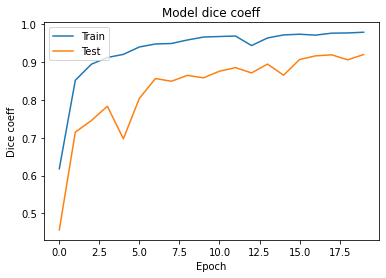

In [10]:
if __name__ == '__main__':
    train_and_predict()